In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
connection = sqlite3.connect("../../data/checking-logs.sqlite")

timestamp = pd.read_sql("SELECT uid, timestamp, numTrials FROM checker " \
"WHERE uid LIKE 'user_%' AND status LIKE 'ready' AND labname LIKE 'project1'", connection)

connection.close()

timestamp['timestamp'] = pd.to_datetime(timestamp['timestamp'])
timestamp = timestamp.sort_values(by=['uid', 'timestamp'])
timestamp['numTrials'] = timestamp.groupby('uid').cumcount()+1
timestamp


,uid,timestamp,numTrials
886,user_1,2020-05-14 20:56:08.898880,1
887,user_1,2020-05-14 20:58:02.313690,2
888,user_1,2020-05-14 20:58:46.322457,3
900,user_1,2020-05-14 21:08:15.434237,4
901,user_1,2020-05-14 21:10:14.867603,5
...,...,...,...
768,user_8,2020-05-14 16:18:00.528528,4
794,user_8,2020-05-14 16:41:03.916147,5
833,user_8,2020-05-14 17:40:47.781946,6
835,user_8,2020-05-14 17:46:54.469822,7


* analyze only the users and not the admins
* take into account only logs from the table checker where the status is ready
* you can choose the palette that you enjoy
* the linewidth should be 3
* the background of the graph is gray
* the height should be 10, and the width should 1.5x in relation to the height
* the fontsize of the title should be 30
* the fontsize of the axises labels is 15

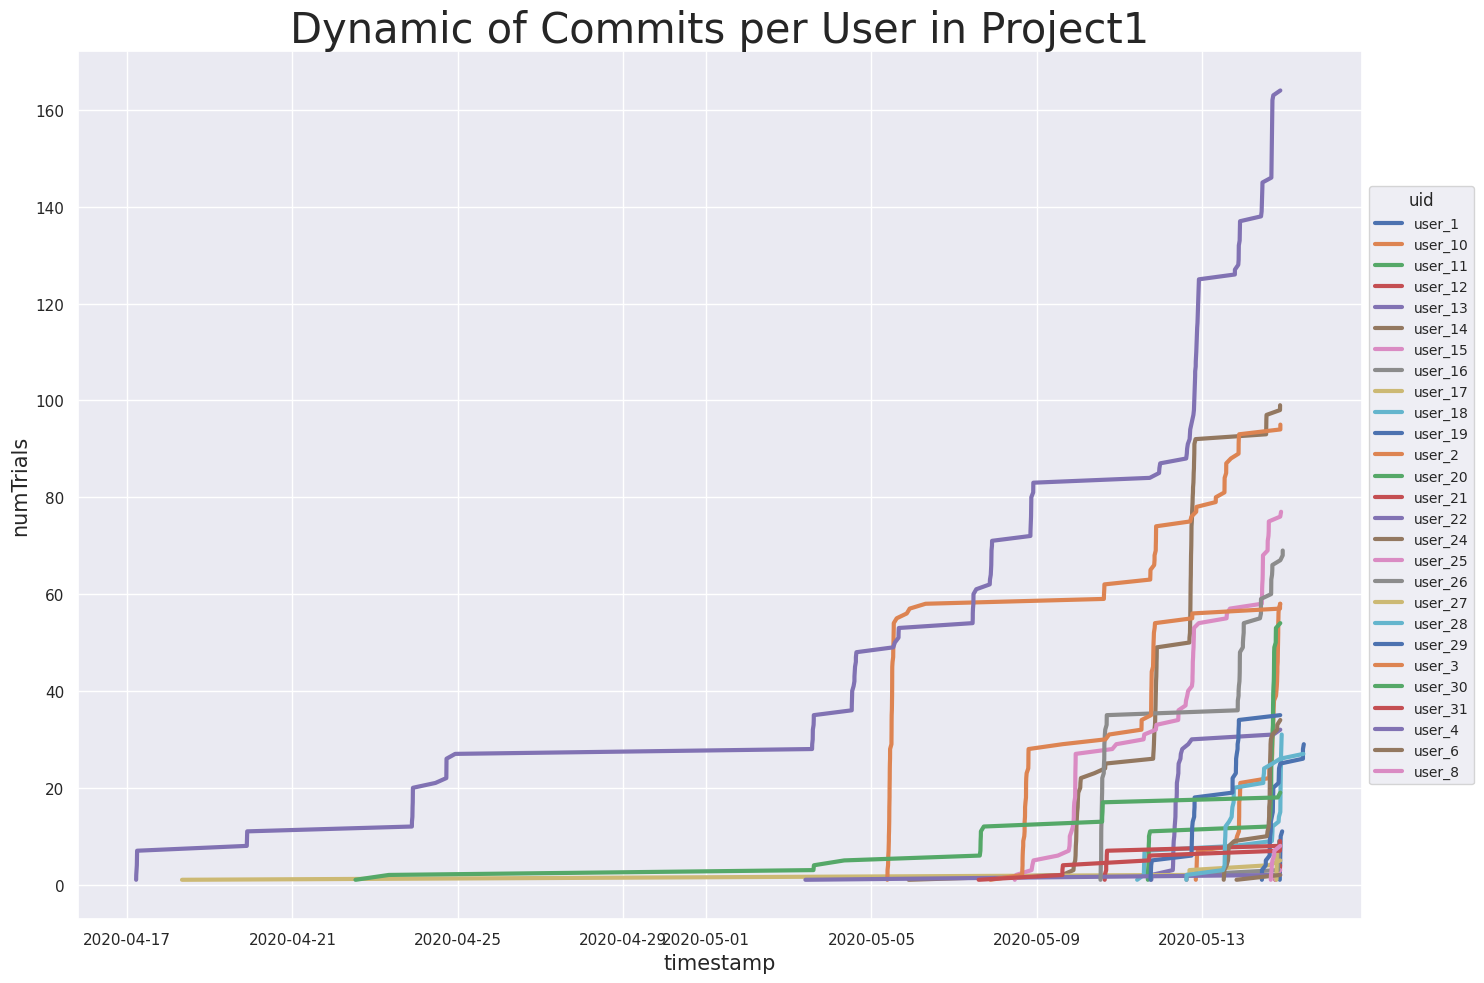

In [65]:
plt.figure(figsize=(15, 10))

sns.lineplot(
    data=timestamp,
    x='timestamp',
    y='numTrials',
    hue='uid',
    palette='deep',
    linewidth=3
)

plt.title('Dynamic of Commits per User in Project1', fontsize=30)
plt.xlabel('timestamp', fontsize=15)
plt.ylabel('numTrials', fontsize=15)

plt.legend(title='uid', fontsize=10, title_fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))


plt.tight_layout()
plt.show()

at the end of your Jupyter Notebook create a markdown cell and insert the questions (answer them looking only at the graphs):  
“Which user was the leader in the number of commits almost all of the time?”   
The answer: user_4.  
“Which user was the leader for only a short period of time?”   
The answer: user_2.